<a href="https://colab.research.google.com/github/junanote/test_deeplearning/blob/master/NaverShopping__BiLSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!python -m pip install konlpy

In [94]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   103k      0 --:--:-- --:--:-- --:--:--  103k


In [95]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [96]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0   102M      0 --:--:-- --:--:-- --:--:--  102M


In [97]:
import pandas as pd
total_data = pd.read_table('./naver_shopping.txt', names=['ratings','reviews'])
total_data.head(10)

ratings                                            reviews
0        5                                            Î∞∞Í≥µÎπ†Î•¥Í≥† Íµø
1        2                      ÌÉùÎ∞∞Í∞Ä ÏóâÎßùÏù¥ÎÑ§Ïö© Ï†ÄÌù¨Ïßë Î∞ëÏóêÏ∏µÏóê ÎßêÎèÑÏóÜÏù¥ ÎÜîÎëêÍ≥†Í∞ÄÍ≥†
2        5  ÏïÑÏ£ºÏ¢ãÏïÑÏöî Î∞îÏßÄ Ï†ïÎßê Ï¢ãÏïÑÏÑú2Í∞ú Îçî Íµ¨Îß§ÌñàÏñ¥Ïöî Ïù¥Í∞ÄÍ≤©Ïóê ÎåÄÎ∞ïÏûÖÎãàÎã§. Î∞îÎäêÏßàÏù¥ Ï°∞Í∏à ...
3        2  ÏÑ†Î¨ºÏö©ÏúºÎ°ú Îπ®Î¶¨ Î∞õÏïÑÏÑú Ï†ÑÎã¨ÌñàÏñ¥Ïïº ÌïòÎäî ÏÉÅÌíàÏù¥ÏóàÎäîÎç∞ Î®∏Í∑∏ÏªµÎßå ÏôÄÏÑú ÎãπÌô©ÌñàÏäµÎãàÎã§. Ï†Ñ...
4        5                  ÎØºÌä∏ÏÉâÏÉÅ ÏòàÎªêÏöî. ÏòÜ ÏÜêÏû°Ïù¥Îäî Í±∞Îäî Ïö©ÎèÑÎ°úÎèÑ ÏÇ¨Ïö©ÎêòÎÑ§Ïöî „Öé„Öé
5        2  ÎπÑÏ∂îÌï©ÎãàÎã§ Í≥ÑÎûÄ Îí§ÏßëÏùÑ Îïå ÏôÑÏ†Ñ Î∂àÌé∏Ìï¥Ïöî „Ö†„Ö† ÏΩîÌåÖÎèÑ Î¨ªÏñ¥ÎÇòÍ≥† Î≥¥Í∏∞Ïóî ÏòàÏÅòÍ≥† Ïã§Ïö©Ï†Å...
6        1  Ï£ºÎ¨∏ÏùÑ 11Ïõî6Ïóê ÏãúÏº∞ÎäîÎç∞ 11Ïõî16ÏùºÏóê Î∞∞ÏÜ°Ïù¥ ÏôîÎÑ§Ïöî „Öé„Öé„Öé Ïó¨Í∏∞ ÌöåÏÇ¨Ï∏°Í≥ºÎäî Ï†ÑÌôî...
7        2                          ÎÑâÎÑâÌïú Í∏∏Ïù¥Î°ú Ï£ºÎ¨∏ÌñàÎäîÎç∞ÎèÑ Ïïà ÎßûÎÑ§Ïöî Î≥ÑÎ°úÏòàÏöî
8        2                          Î≥¥Ìè¥Ïù¥ Í≥ÑÏÜç ÎïåÏ≤òÎüº ÎÇòÏò§Îã§Í∞Ä ÏßÄÍ∏àÏùÄ ÏïàÎÇòÎÑ§Ïöî~
9        2  110Ïù∏Îç∞ Ï†ÑÎ¨∏ÏÜçÏò∑Î∏åÎûúÎìú ÏúÑÏÉùÌå¨Ìã∞105Î≥¥Îã§ ÏûëÏùÄÎìØÌï¥Ïöî. Î∂àÌé∏Ìï¥Ïöî. Î∞¥Îî©Î∂ÄÎ∂ÑÏù¥ Îã§ Ïã†...

In [98]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [99]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)
len(total_data)

199908

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((149931,), (149931,), (49977,), (49977,))

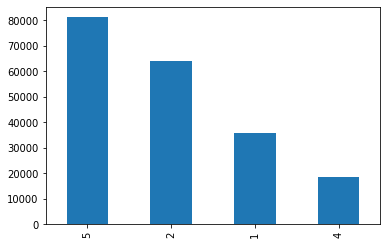

In [103]:
y_data.value_counts().plot(kind='bar')

# NLP(ÌÜ†ÌÅ∞Ìôî)


In [ ]:
type(x_train)
x_train.str.replace('[^Í∞Ä-Ìû£„Ñ±-„Öé„Ö†]','')

In [141]:
x_train.str.replace('[^Í∞Ä-Ìû£„Ñ±-„Öé„Ö† ]','') #[a-zA-Z]]   Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨Ï†Ñ ÌïúÍ∏ÄÎßå Í∞ÄÏ†∏Ïò§Í≤å... ÎåÄÎ¨∏ÏûêÎßå ÎÇòÏò§Í≤å

196938    Î¶¨Ìçº Ï†úÌíàÏùÑ Î≥¥ÎÇ¥ÏÖ®ÎÇò ÏÉàÏ†úÌíàÏóê Ïä§ÌÅ¨Î†àÏπò ÏûëÎ†¨ ÏöîÏ≤≠ÏÇ¨Ìï≠Ïóê ÍπîÎÅîÌïú Ï†úÌíà Î∞îÎûòÎäîÎç∞ Î∞∞ÏÜ°ÎèÑ...
67038          Í¥úÏ∞ÆÏïÑÏöî ÏΩîÌåÖÏù¥ ÎêòÏñ¥ÏûàÏñ¥ÏÑú ÏùåÏãùÎ¨º ÌùòÎ†§ÎèÑ Í±±Ï†ïÏóÜÍ≥† Íµ¨ÍπÄÏùÄ ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎ©¥ Ìé¥ÏßÄÍ≤†Ï£†
17017     ÏÇ¨Ïö© Ï≤´ÎÇ†Ïù¥Îùº ÏÑ±Îä•Ï†ÅÏù∏ Î©¥ÏùÄ ÏïÑÏßÅ Ïûò Î™®Î•¥Í≤†ÏúºÎÇò ÏÜåÏùåÎèÑ Î≥ÑÎ°ú ÏïàÎÇòÍ≥† ÎîîÏûêÏù∏ÎèÑ ÍπúÏ∞çÌïò...
194632    ÎßàÎÇÆÎã§Í∞ÄÎÜç Îùº „ÖÅ„Ñ¥„ÖáÎùºÎ¥ä ÎçîÎ°ú „ÖÅÎÇò„ÖáÎ¶¨Î≤ö ÎîîÏÜåÏù¥ÎùºÎπÑ„Ñπ„ÖàÎçî„ÖÅÎÇò„Ñπ„ÖÇÏ°∞Îã§Îü¨„ÖÅÎÇò„ÖáÎ¢àÎÑàÏò§Îùº„ÖÇ...
55177     Ï∂îÏ≤úÌï©ÎãàÎã§ Î∞õÏûêÎßàÏûê Î∞úÎùºÎ≥¥ÏïòÎäîÎç∞ ÏñáÍ≤å Ïûò Î∞úÎ¶¨ÎÑ§Ïöî Í∞ñÍ≥†ÏûàÎäî Î≤†Ïù¥Ïä§ÏΩîÌä∏Î≥¥Îã§ Í∏àÎ∞© ÎßêÎùº...
                                ...                        
52062     ÏÑ§ÎßàÎßûÍ≤†ÏßÄ ÌïòÍ≥† ÏÉÄÎäîÎç∞ ÏßëÏóêÏûàÎäî ÌÜµÏùÄ Îã§ ÏïàÎßûÏïÑÏöî Íµ¨Î©çÏù¥ ÎÑàÎ¨¥Ïª§ÏÑú Í±∏ÏàòÍ∞ÄÏóÜÏñ¥Ïöî„Ö† ÌõÑ...
169016                            Ï≤úÎèÑ Î∂ÄÎìúÎüΩÍ≥† Ïπ®ÎåÄÏóê Ïûò Î∞ÄÏ∞©ÎêòÏñ¥ Ï¢ãÏùÄÍ±∞Í∞ôÏïÑÏöî
1986                                    

In [106]:
from konlpy.tag import Mecab


In [107]:
mecab = Mecab()
print(mecab.morphs('ÏôÄ Ïù¥Îü∞ Í≤ÉÎèÑ ÏÉÅÌíàÏù¥ÎùºÍ≥† Ï∞®ÎùºÎ¶¨ ÎÇ¥Í∞Ä ÎßåÎìúÎäîÍ≤å ÎÇòÏùÑ Í≤É Í∞ôÎã§.'))

['ÏôÄ', 'Ïù¥Îü∞', 'Í≤É', 'ÎèÑ', 'ÏÉÅÌíà', 'Ïù¥', 'ÎùºÍ≥†', 'Ï∞®ÎùºÎ¶¨', 'ÎÇ¥', 'Í∞Ä', 'ÎßåÎìú', 'Îäî', 'Í≤å', 'ÎÇòÏùÑ', 'Í≤É', 'Í∞ô', 'Îã§', '.']


In [108]:
x_train_small = x_train[0:5000]

In [ ]:
sentance = list()
stopwords = ['ÎèÑ', 'Îäî', 'Îã§', 'Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Ìïú', 'Ïóê', 'Ìïò', 'Í≥†', 'ÏùÑ', 'Î•º', 'Ïù∏', 'ÎìØ', 'Í≥º', 'ÏôÄ', 'ÎÑ§', 'Îì§', 'ÎìØ', 'ÏßÄ', 'ÏûÑ', 'Í≤å']

for tok in x_train_small :
  encoded = mecab.morphs(tok)
  sentance.append([item for item in encoded if item not in stopwords])

sentance  

## Tokenizer


In [110]:
print(sentance)

[['Î¶¨Ìçº', 'Ï†úÌíà', 'Î≥¥ÎÇ¥', 'ÏÖ®', 'ÎÇò', '.', '..', 'ÏÉà', 'Ï†úÌíà', 'Ïä§', 'ÌÅ¨Î†à', 'Ïπò', 'ÏûëÎ†¨', '.', '..', 'ÏöîÏ≤≠', 'ÏÇ¨Ìï≠', 'ÍπîÎÅî', 'Ï†úÌíà', 'Î∞îÎûò', 'ÎäîÎç∞', '.', '.', 'Î∞∞ÏÜ°', 'Îä¶', '.', 'Ï†úÌíà', 'Í∑∏Î†á', 'ÎÑ§Ïöî', '.', '..', 'Í≤ÄÏàò', 'Ï¢Ä', 'Ï†úÎåÄÎ°ú', 'Î∞îÎûçÎãàÎã§', '.'], ['Í¥úÏ∞Æ', 'ÏïÑÏöî', '!', '!', 'ÏΩîÌåÖ', 'Îêò', 'Ïñ¥', 'Ïûà', 'Ïñ¥ÏÑú', 'ÏùåÏãùÎ¨º', 'ÌùòÎ†§ÎèÑ', 'Í±±Ï†ï', 'ÏóÜ', '.', '..', 'Íµ¨ÍπÄ', 'ÏãúÍ∞Ñ', 'ÏßÄÎÇò', 'Î©¥', 'Ìé¥', 'Í≤†Ï£†', '^^'], ['ÏÇ¨Ïö©', 'Ï≤´ÎÇ†', 'Îùº', 'ÏÑ±Îä•', 'Ï†Å', 'Î©¥', 'ÏïÑÏßÅ', 'Ïûò', 'Î™®Î•¥', 'Í≤†', 'ÏúºÎÇò', 'ÏÜåÏùå', 'Î≥ÑÎ°ú', 'Ïïà', 'ÎÇò', 'ÎîîÏûêÏù∏', 'ÍπúÏ∞ç', 'Îãà', 'ÏòàÏÅ©ÎãàÎã§', '.', 'ÎçîÎçï', 'Ïö±', 'Í∞ÄÍ≤©ÎåÄ', 'Ïò§ÌÜ†', 'Î™®Îìú', 'Ïûà', 'Ïã†Í∏∞', 'Î∞©Í∏∞', 'ÎÑ§Ïöî', '.'], ['Îßà', 'ÎÇÆ', '„ÖóÍ∞Ä„ÖìÎÜç', 'Îùº', '„Öì„Öó', '„Ö£', '„ÖÅ', '„Ñ¥', '„ÖáÎùº„ÖìÎ¥ä', '„ÖèÎçîÎ°ú', '„ÖÅ', 'ÎÇò', '„Ö£', '„Öì„ÖáÎ¶¨„ÖèÎ≤ö', 'Îîî', 'ÏÜå', '„Öì„Ö£„ÖìÏù¥Îùº„ÖìÎπÑ', ';', '„Öè„Ñπ„ÖàÎçî„Ö£„ÖÅÎÇò„Öì„Ñπ', ';', '„Ö£', '„ÖÇ', 'Ï°

In [111]:
import tensorflow as tf


In [112]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentance)  

In [ ]:
tokenizer.word_index   # ÏÇ¨Ï†ÑÏù¥ ÎßåÎì§Ïñ¥Ïßê

In [ ]:
tokenizer.word_counts  # Ï†ÑÏ≤¥ Î¨∏Ïû•ÏóêÏÑú Î™áÎ≤à Î∞òÎ≥µÎêòÏóàÎäîÏßÄ ÌôïÏù∏

In [115]:
total_cnt = len(tokenizer.word_index) # Ï†ÑÏ≤¥Îç∞Ïù¥ÌÑ∞Î•º ÎèåÎ¶º  Î™®Îì†Í±∞ÏóêÏÑú Î†àÏñ¥Ïóê Ìï¥ÎãπÎêòÎäî Îã®Ïñ¥Î•º Î∫Ä Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì¨

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò
  if(value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2ÎØ∏ÎßåÏù∏ Îã®Ïñ¥Ïùò Ïàò 

In [116]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(8120, 5360, 66.00985221674877, 7.869661694730222)

In [117]:
vocab_size = total_cnt - rare_cnt

In [118]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.index_word   # -> Ïà´ÏûêÎ°ú ÎßåÎì¨ 

In [120]:
x_train_small = tokenizer.texts_to_sequences(sentance)

In [121]:
print(x_train_small[0:3]) # Î¶¨Ïä§Ìä∏Ïù¥ÎØÄÎ°ú shapeÏïàÎê®

[[1, 46, 121, 287, 36, 2, 29, 330, 46, 498, 1012, 415, 1, 2, 29, 682, 1394, 140, 46, 1, 7, 2, 2, 14, 320, 2, 46, 442, 4, 2, 29, 655, 55, 378, 1225, 2], [92, 6, 22, 22, 1013, 20, 17, 9, 56, 2196, 1, 443, 31, 2, 29, 1395, 291, 444, 57, 1014, 1, 85], [27, 2197, 60, 719, 117, 57, 152, 8, 141, 43, 379, 499, 79, 10, 36, 177, 2198, 65, 1113, 2, 1, 1, 1396, 1, 1, 9, 1226, 1, 4, 2]]


In [122]:
len(x_train_small[0]), len(x_train_small[40]), len(x_train_small[50])

(36, 3, 31)

In [123]:
hist_len = [len(words) for words in x_train_small]  

(array([ 21.,  62., 159., 299., 689., 343., 281., 246., 408., 164., 162.,
        136., 237., 121., 106.,  91., 164.,  84.,  75.,  67., 143.,  67.,
         73.,  62.,  56.,  87.,  41.,  46.,  38.,  80.,  33.,  23.,  39.,
         63.,  21.,  25.,  21.,  34.,  14.,  23.,  20.,  21.,  12.,   8.,
          7.,  14.,   7.,   3.,   2.,   2.]),
 array([ 1.  ,  2.24,  3.48,  4.72,  5.96,  7.2 ,  8.44,  9.68, 10.92,
        12.16, 13.4 , 14.64, 15.88, 17.12, 18.36, 19.6 , 20.84, 22.08,
        23.32, 24.56, 25.8 , 27.04, 28.28, 29.52, 30.76, 32.  , 33.24,
        34.48, 35.72, 36.96, 38.2 , 39.44, 40.68, 41.92, 43.16, 44.4 ,
        45.64, 46.88, 48.12, 49.36, 50.6 , 51.84, 53.08, 54.32, 55.56,
        56.8 , 58.04, 59.28, 60.52, 61.76, 63.  ]),
 <a list of 50 Patch objects>)

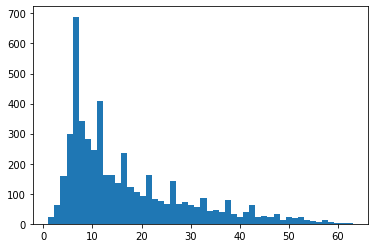

In [124]:
import matplotlib.pyplot as plt

plt.hist(hist_len, bins=50)

In [125]:
sum(hist_len)/len(x_train_small)

16.8546

In [126]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [127]:
y_train_small = y_train[0:5000]

In [128]:
np.unique(y_train_small)

array([1, 2, 4, 5])

In [129]:
y_train_small = np.array(y_train_small)-1
np.unique(y_train_small)

array([0, 1, 3, 4])

In [130]:
y_train_small[0:6]

array([1, 4, 3, 4, 4, 1])

In [131]:
import numpy as np
np.unique(y_train_small)  #ÏõêÌï´Ïù∏ÏΩîÎî©Ïù¥ 0Î∂ÄÌÑ∞ ÏãúÏûë

array([0, 1, 3, 4])

In [132]:
len(x_train_small),len(y_train_small)

(5000, 5000)

In [133]:
#y_train_onehot = tf.keras.utils.to_categorical(y_train_small)
#len(y_train_onehot[5])

# make model


In [134]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50))  #dimÏùÄ ÏÇ¨Ï†ÑÏÇ¨Ïù¥Ï¶à, output ÌñâÎ†¨Ïùò Î∞©Ìñ•Ïùò Í∞í
#model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
#model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Dense(5,activation='softmax'))  #ÏùòÍ≤¨ÏùÑ ÎÇ¥Îäî ÎÖ∏ÎìúÏùò Í∞ØÏàò - ÎÑòÌååÏù¥ Ïú†ÎãàÌÅ¨Î°ú ÏïåÏàò ÏûàÏùå
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])  


In [135]:
model.fit(x_train_small, y_train_small, epochs=3, batch_size=256, validation_split=0.3, shuffle=True)  #shuffle ÏàúÏÑúÎ•º ÏÑûÏñ¥Ï§å

Epoch 1/3
14/14 [==============================] - 11s 568ms/step - loss: 1.4472 - acc: 0.3729 - val_loss: 1.2905 - val_acc: 0.3160
Epoch 2/3
14/14 [==============================] - 7s 500ms/step - loss: 1.2839 - acc: 0.4143 - val_loss: 1.2647 - val_acc: 0.4007
Epoch 3/3
14/14 [==============================] - 7s 498ms/step - loss: 1.2553 - acc: 0.4317 - val_loss: 1.2376 - val_acc: 0.4173
